## Timestamps
The pandas library represents an instant in time using the pandas.Timestamp class. For example:

In [1]:
import pandas as pd

# Create a timestamp 
pd.Timestamp(year = 2024,
            month = 10,
            day = 21,
            hour = 10, 
            minute = 1,
            second = 33)

Timestamp('2024-10-21 10:01:33')

When we store multiple pandas.Timestamps in a pandas.Series the data type of the column is set to datetime64[ns]:

In [2]:
# Notice the data type of the column is datetime64
pd.Series([pd.Timestamp(2020,10,18), 
           pd.Timestamp(2020,10,17),
           pd.Timestamp(2020,10,16)])

0   2020-10-18
1   2020-10-17
2   2020-10-16
dtype: datetime64[ns]

### Data exploration
Let’s start by reading in the data and taking a look at it:

In [3]:
# Read in data 
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/main/data/boulder_colorado_2013_hourly_precipitation.csv'
precip = pd.read_csv(URL)

precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,999.99,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.00,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.00,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.00,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.00,,q


<AxesSubplot:>

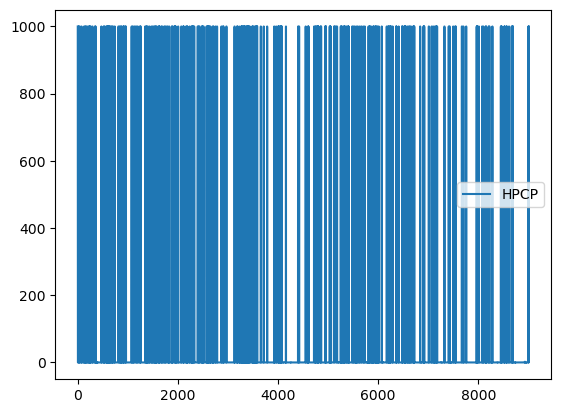

In [4]:
# Plot hourly precipitation in Boulder CO 
precip.plot()

There are a few things going on with this graph:

Outliers: There are many jumps close to 1000. This is clearly not right and these are outliers. Looking at the column descriptions we can see 999.99 indicates the hourly precipitation data is missing.

Indexing: The 
-axis values are given by the index of the dataframe and not relative to time.

Time range: We are only intersted in the precipitation data from 2013, this graph is trying to plot all our data.

Let’s fix each one of these issues separately.

Reading in missing data values
The metadata states the missing values are indicated by the number 999.99. We can use this information to reload the dataframe indicating 999.99 is the missing value. To do this, we add the na_values parameter to the pandas.read_csv() function to indicitate additional values that should be recognized as NA:

In [5]:
# Read in CSV indicating NA values based on metadata
precip = pd.read_csv(URL, na_values=[999.99])

precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,NaN,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.0,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.0,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.0,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.0,,q


<AxesSubplot:>

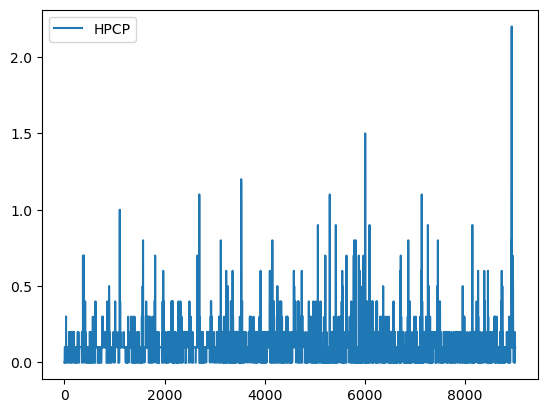

In [6]:
precip.plot()

Casting strings into dates
Notice that the DATE column in our dataframe is not of type datetime. We can check this using the dtypes attribute for dataframes:

In [7]:
# Check whether DATE column is of type datetime
precip.dtypes


STATION              object
STATION_NAME         object
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

Remember that the object dtype means that (most likely) all values in that column are strings. We can easily convert strings to datetime objects using the pandas.to_datetime() function:

pandas.to_datetime() input: a pandas.Series with strings that can be converted to dates
pandas.to_datetime() output: a pandas.Series with the strings converted to datetime objects
#### Example


In [8]:
# Convert DATE column to timestamps
pd.to_datetime(precip.DATE)

0      2000-01-01 00:00:00
1      2000-01-01 01:00:00
2      2000-01-02 20:00:00
3      2000-01-03 01:00:00
4      2000-01-03 05:00:00
               ...        
9001   2013-12-22 01:00:00
9002   2013-12-23 00:00:00
9003   2013-12-23 02:00:00
9004   2013-12-29 01:00:00
9005   2013-12-31 00:00:00
Name: DATE, Length: 9006, dtype: datetime64[ns]

We can overwrite the DATE column with this output:

In [9]:
# Convert DATE column to timestamps
precip.DATE = pd.to_datetime(precip.DATE)

# Check DATE column data type is updated
print(precip.dtypes)

# Check new values
precip.DATE.head()

STATION                     object
STATION_NAME                object
DATE                datetime64[ns]
HPCP                       float64
Measurement Flag            object
Quality Flag                object
dtype: object


0   2000-01-01 00:00:00
1   2000-01-01 01:00:00
2   2000-01-02 20:00:00
3   2000-01-03 01:00:00
4   2000-01-03 05:00:00
Name: DATE, dtype: datetime64[ns]

<AxesSubplot:xlabel='DATE'>

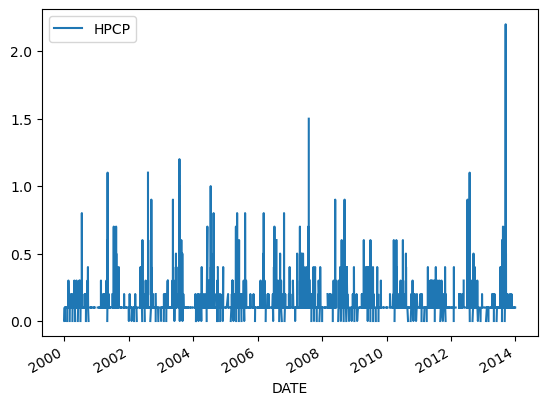

In [10]:
precip.plot(x='DATE', y='HPCP')

Notice the 
-axis is now neatly organized into years.

Next, using our DATE column as the index will allows to perform operations with respect to time, including subsetting and resampling.

In [11]:
# Set DATE coumn as index
precip = precip.set_index('DATE')

# Inspect new index
precip.head()

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2000-01-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2000-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2000-01-02 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 05:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q


<AxesSubplot:xlabel='DATE'>

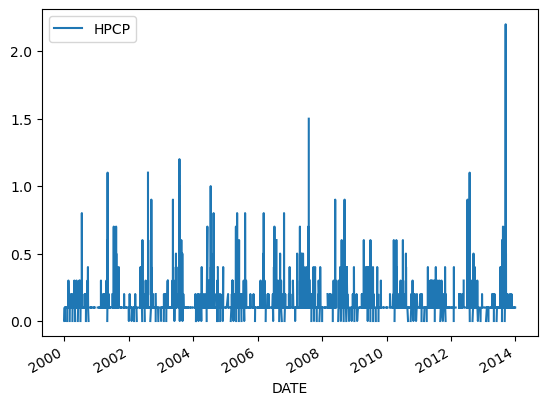

In [12]:
precip.plot()

Subsetting by date
pandas has great functionality to subset a dataframe when using a time index.

Example
We can use .loc[year-month] to select data from a specific year and month:

In [17]:
# Select precipitation data from September 2013
precip.loc['2013-09']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-09-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-09-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-09-01 00:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,],
2013-09-01 01:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,[,
2013-09-01 00:00:00,COOP:055121,LONGMONT 6 NW CO US,NaN,},
...,...,...,...,...,...
2013-09-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.2,,
2013-09-27 10:00:00,COOP:050843,BOULDER 2 CO US,0.1,,
2013-09-27 15:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


Or simply select data from a given year using .loc[year]:

In [18]:
# Select 2013 precipitation data
precip.loc['2013']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2013-01-10 02:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-01-13 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-01-26 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.1,,
2013-01-28 23:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.1,,
...,...,...,...,...,...
2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,NaN,[,
2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,NaN,],
2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


<AxesSubplot:xlabel='DATE'>

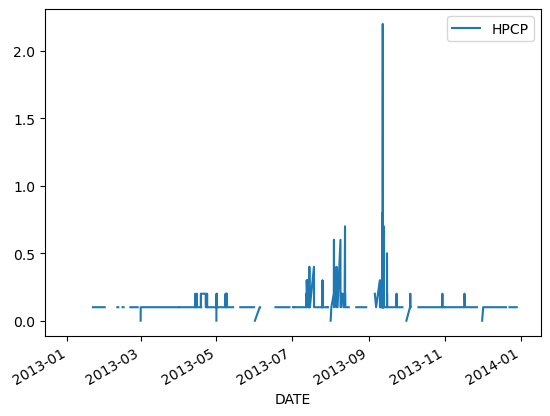

In [19]:
# We can use this selection to plot data as usual. Notice we have a lot of gaps due to missing data:

precip.loc['2013'].plot()